# House price suggestion system

## Import necessary libraries
We used **matplotlib**, **pandas**, **numpy**, **pylab**, **random**, **seaborn**

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns
import random
%matplotlib inline

## Read and show data

In [59]:
df = pd.read_csv('/home/golden-coder/Desktop/ml-env/Datasets/regr/house-price/data.csv')
df.head(9)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87,2,True,True,True,Pardis,6.000000e+08,20000.00
7,59,1,True,True,True,Shahran,2.150000e+09,71666.67
8,54,2,True,True,False,Andisheh,4.930000e+08,16433.33


## Analysis data
we can see some information about data with `info()` function and understand some data has missed in **Address** columns.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


## Data Prepossessing
We can fix data missing issue with `dropna()` function.

In [60]:
df.dropna(inplace=True)

### show new data

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3456 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3456 non-null   object 
 1   Room        3456 non-null   int64  
 2   Parking     3456 non-null   bool   
 3   Warehouse   3456 non-null   bool   
 4   Elevator    3456 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3456 non-null   float64
 7   Price(USD)  3456 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 172.1+ KB


### Proccess Data
- Convert boolean values to integer.
- Convert **Area** type to integer.
- Remove items that has Area value grater than 1000.
- Split data to **x** and **y**.

In [61]:
df[['Parking', 'Warehouse', 'Elevator']] = df[['Parking', 'Warehouse', 'Elevator']].astype(int)
df[['Area']] = df[['Area']].map(lambda x: str(x).replace(' ', '').replace(',', '')).astype(int)
df = df[df['Area'] <= 1000]

x = df.drop(['Price(USD)', 'Price', 'Address'], axis=1)
y = df['Price(USD)']

### Split test and train data
We use `train_test_split()` function that imported from sklearn for split test and train data.

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Create train_data with joined **x_train** and **y_train** data.

In [63]:
train_data = x_train.join(y_train)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2760 entries, 973 to 1777
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        2760 non-null   int64  
 1   Room        2760 non-null   int64  
 2   Parking     2760 non-null   int64  
 3   Warehouse   2760 non-null   int64  
 4   Elevator    2760 non-null   int64  
 5   Price(USD)  2760 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 215.5 KB


### Drow histogram

array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Room'}>],
       [<Axes: title={'center': 'Parking'}>,
        <Axes: title={'center': 'Warehouse'}>],
       [<Axes: title={'center': 'Elevator'}>,
        <Axes: title={'center': 'Price(USD)'}>]], dtype=object)

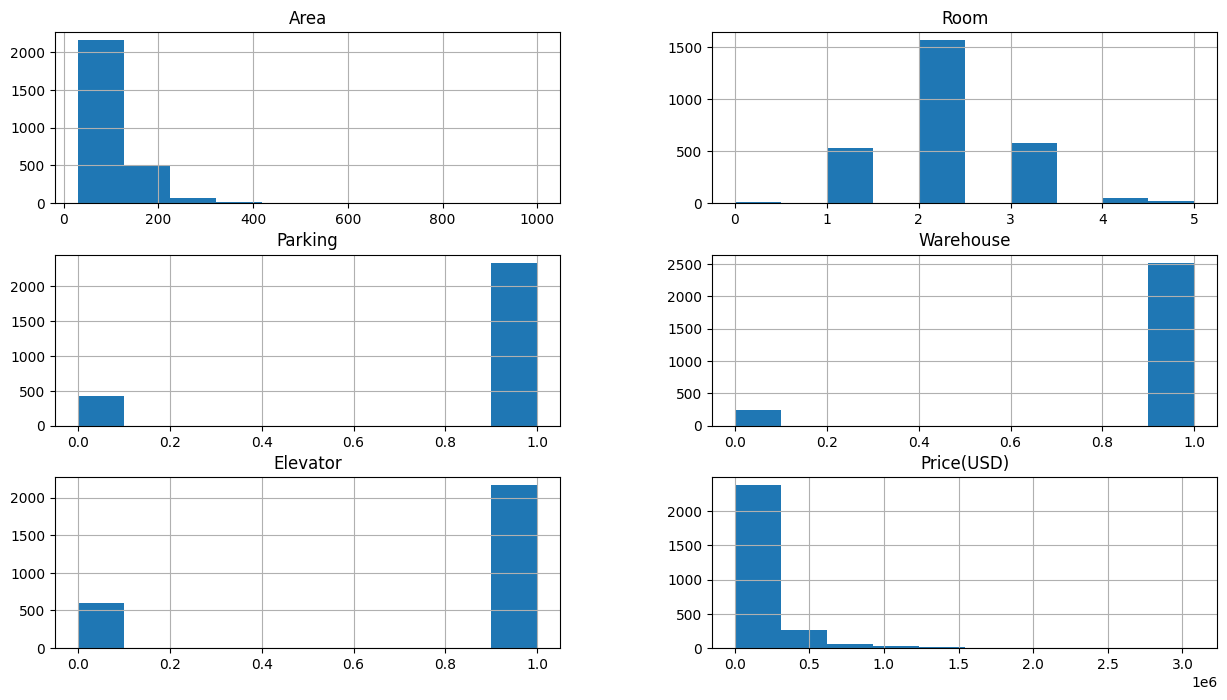

In [64]:
train_data.hist(figsize=(15,8))

### Drow heatmap
We use heatmap that imported from seaborn for show data heatmap.
We understand **Area** and **Rooms** have more importance.

<Axes: >

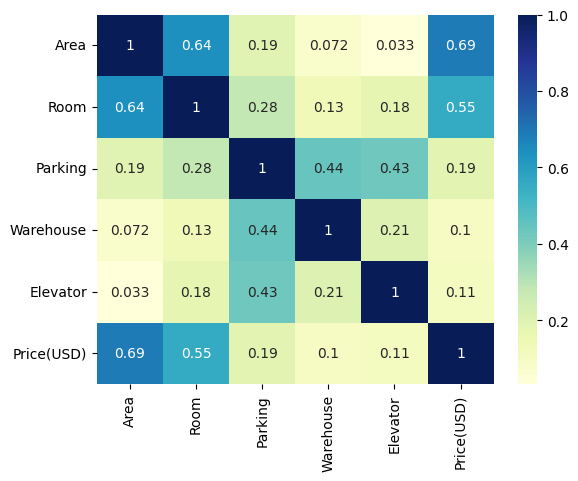

In [65]:
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

### Drow coolwarm scatter
We understand the **Area** and **Price** have a direct relationship.

<Axes: xlabel='Area', ylabel='Price(USD)'>

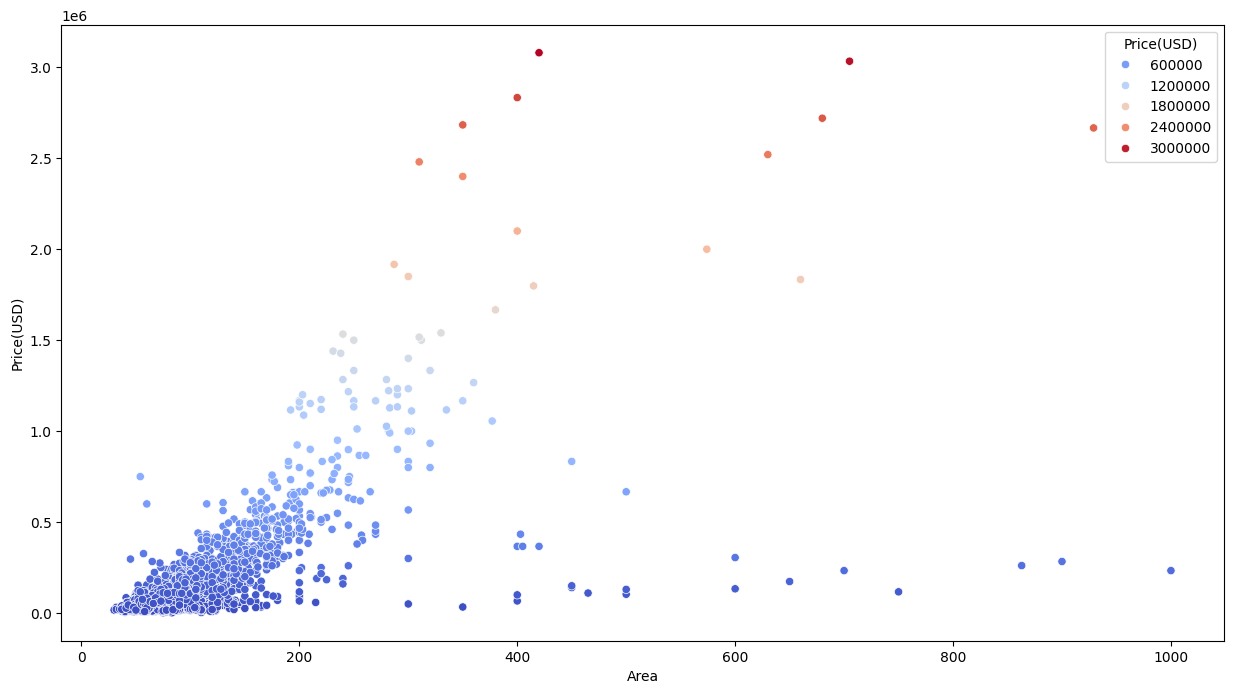

In [66]:
 plt.figure(figsize=(15,8))
 sns.scatterplot(x='Area', y='Price(USD)', data=train_data, hue='Price(USD)', palette='coolwarm')

## Learn model with LinearRegression

In [73]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(x_train, y_train)

print('coeff', reg.coef_)
print('intercept', reg.intercept_)

coeff [ 2118.14417772 62578.41128713 -9463.23426757 31695.74946283
 34380.72834859]
intercept -229628.0260215683


## Prediction

In [74]:
from sklearn.metrics import r2_score

y_hat = reg.predict(x_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_test)))
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y_test) ** 2))

print("R2-score: %.2f" % r2_score(y_test,y_hat) )

Mean absolute error: 102227.63
Residual sum of squares: 35123093087.41
R2-score: 0.59


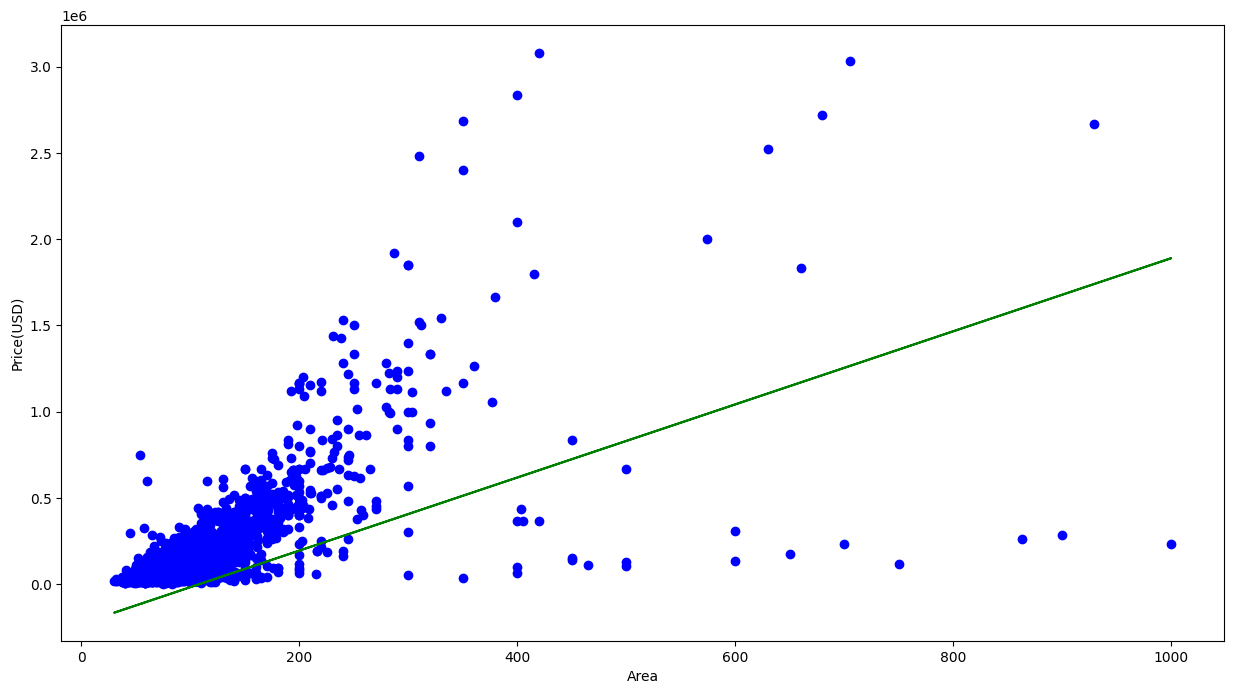

In [75]:
plt.figure(figsize=(15,8))
plt.scatter(train_data['Area'], train_data['Price(USD)'],  color='blue')

plt.plot(x_train['Area'], reg.coef_[0]*x_train['Area'] + reg.intercept_, 'g-')

plt.xlabel("Area")
plt.ylabel("Price(USD)")

plt.show()